In [21]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.metrics import classification_report
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling2D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn as sns
from glob import glob
import cv2
from sklearn.utils import shuffle


In [2]:
# READ IN AUDIO FILES 
audio = "dataset/audio_speech_actors_01-24/"

In [3]:
dicts={'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [4]:
path_main=audio

In [5]:
folders_main=os.listdir(path_main)

# Log-Mel Spectrogram

In [6]:
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)

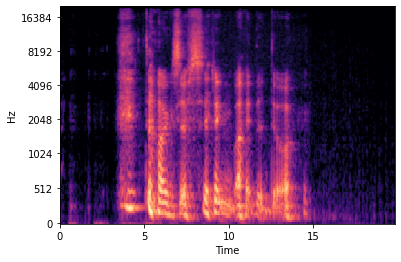

In [7]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');


In [8]:
import re
counter=0
for folders in folders_main :
    path_in='dataset/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='dataset/sorted_data/{0}/{1}.jpeg'.format(emotion,file)
        print(path_save)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(y)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

01 neutral
dataset/sorted_data/neutral/03-01-01-01-01-01-01.wav.jpeg
01 neutral
dataset/sorted_data/neutral/03-01-01-01-01-02-01.wav.jpeg
01 neutral
dataset/sorted_data/neutral/03-01-01-01-02-01-01.wav.jpeg
01 neutral
dataset/sorted_data/neutral/03-01-01-01-02-02-01.wav.jpeg
01 calm
dataset/sorted_data/calm/03-01-02-01-01-01-01.wav.jpeg
01 calm
dataset/sorted_data/calm/03-01-02-01-01-02-01.wav.jpeg
01 calm
dataset/sorted_data/calm/03-01-02-01-02-01-01.wav.jpeg
01 calm
dataset/sorted_data/calm/03-01-02-01-02-02-01.wav.jpeg
01 calm
dataset/sorted_data/calm/03-01-02-02-01-01-01.wav.jpeg
01 calm
dataset/sorted_data/calm/03-01-02-02-01-02-01.wav.jpeg
01 calm
dataset/sorted_data/calm/03-01-02-02-02-01-01.wav.jpeg
01 calm
dataset/sorted_data/calm/03-01-02-02-02-02-01.wav.jpeg
01 happy
dataset/sorted_data/happy/03-01-03-01-01-01-01.wav.jpeg
01 happy
dataset/sorted_data/happy/03-01-03-01-01-02-01.wav.jpeg
01 happy
dataset/sorted_data/happy/03-01-03-01-02-01-01.wav.jpeg
01 happy
dataset/sorted_d

# Noise

In [ ]:
# FUNCTION TO ADD WHITE NOISE
def noise(y):
    noise_amp = 0.05*np.random.uniform()*np.amax(y)   
    y = y.astype('float64') + noise_amp * np.random.normal(size=y.shape[0])
    return y

In [ ]:
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)

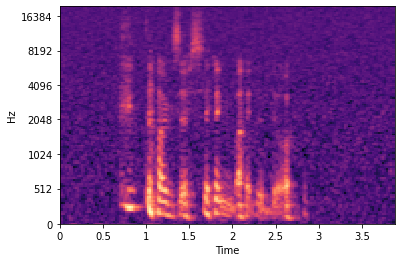

In [ ]:
y = noise(y)
y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
db_spec = librosa.power_to_db(y)
librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');

In [ ]:
import re
counter=0
for folders in folders_main :
    path_in='dataset/audio_speech_actors_01-24/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='dataset/noise/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        y = noise(y)
        y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(y)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

# Stretch

In [6]:
# FUNCTION TO STRETCH THE SOUND
def stretch(y, rate=0.8):
    data = librosa.effects.time_stretch(y, rate)
    return data

In [7]:
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)

In [8]:
y=yt

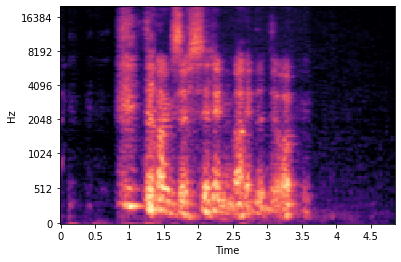

In [9]:
y= stretch(y)
y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
db_spec = librosa.power_to_db(y)
librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');

01 neutral
01 neutral
01 neutral
01 neutral
01 calm
01 calm
01 calm
01 calm
01 calm
01 calm
01 calm
01 calm
01 happy
01 happy
01 happy
01 happy
01 happy
01 happy
01 happy
01 happy
01 sad
01 sad
01 sad
01 sad
01 sad
01 sad
01 sad
01 sad
01 angry
01 angry
01 angry
01 angry
01 angry
01 angry
01 angry
01 angry
01 fearful
01 fearful
01 fearful
01 fearful
01 fearful
01 fearful
01 fearful
01 fearful
01 disgust
01 disgust
01 disgust
01 disgust
01 disgust
01 disgust
01 disgust
01 disgust
01 surprised
01 surprised
01 surprised
01 surprised
01 surprised
01 surprised
01 surprised
01 surprised
02 neutral
02 neutral
02 neutral
02 neutral
02 calm
02 calm
02 calm
02 calm
02 calm
02 calm
02 calm
02 calm
02 happy
02 happy
02 happy
02 happy
02 happy
02 happy
02 happy
02 happy
02 sad
02 sad
02 sad
02 sad
02 sad
02 sad
02 sad
02 sad
02 angry
02 angry
02 angry
02 angry
02 angry
02 angry
02 angry
02 angry
02 fearful
02 fearful
02 fearful
02 fearful
02 fearful
02 fearful
02 fearful
02 fearful
02 disgust
02 di

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset/audio_speech_actors_01-24/Actor_16'

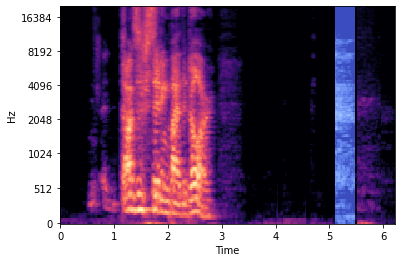

In [10]:
import re
counter=0
for folders in folders_main :
    path_in='dataset/audio_speech_actors_01-24/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='dataset/stretch/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        y= stretch(y)
        y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(y)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

# Speed N Pitch

## Attach labels to Stretch

In [11]:
import glob

angry = glob.glob('dataset/stretch/angry/*.*')
calm = glob.glob('dataset/stretch/calm/*.*')
disgust = glob.glob('dataset/stretch/disgust/*.*')
fearful = glob.glob('dataset/stretch/fearful/*.*')
happy = glob.glob('dataset/stretch/happy/*.*')
neutral = glob.glob('dataset/stretch/neutral/*.*')
sad = glob.glob('dataset/stretch/sad/*.*')
surprised = glob.glob('dataset/stretch/surprised/*.*')

In [12]:
data = []
labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Surprised')

data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3,random_state=22, stratify=labels)

# X_model, X_test, y_model, y_test = train_test_split(data, labels, test_size=0.3,random_state=22, stratify=labels)
# X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.3,random_state=22,stratify=y_model)

In [13]:
def get_images(directory):
    Images = []
    Labels = []  
    label = 0
    
    for labels in os.listdir(directory): 
        if labels == 'angry': 
            label = 'angry'
        elif labels == 'calm':
            label = 'calm'
        elif labels == 'disgust':
            label = 'disgust'
        elif labels == 'fearful':
            label = 'fearful'
        elif labels == 'happy':
            label = 'happy'
        elif labels == 'neutral':
            label = 'neutral'
        elif labels == 'sad':
            label = 'sad'
        elif labels == 'surprised':
            label = 'surprised'
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(75,75)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            # image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=200) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {'angry':'angry', 'calm':'calm', 'disgust':'disgust', 'fearful':'fearful', 'happy':'happy', 'neutral':'neutral','sad':'sad','surprised':'surprised'}
    
    return labels[class_code]

In [14]:
Images, Labels = get_images('dataset/stretch/') #Extract the training images from the folders.

# Process Images for Transfer Learning

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Images, Labels, test_size=0.3,random_state=22, stratify=Labels)

In [40]:
X_train = pd.Series(X_train)
X_train.astype('float32')

ValueError: setting an array element with a sequence.

In [33]:
from keras.utils import np_utils

lb = LabelEncoder()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

AttributeError: 'list' object has no attribute 'astype'

In [20]:
X_test.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
X_train.shape

(4025, 224, 224, 3)

In [ ]:
print(y_test)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


# New VGG16

In [ ]:
from keras.applications import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.1)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
for layer in transfer_model.layers[:19]:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(transfer_model.layers):
    print(i, layer.name, layer.trainable)

0 input_3 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False
19 flatten_2 True
20 dense_6 True
21 dropout_2 True
22 dense_7 True
23 dense_8 True


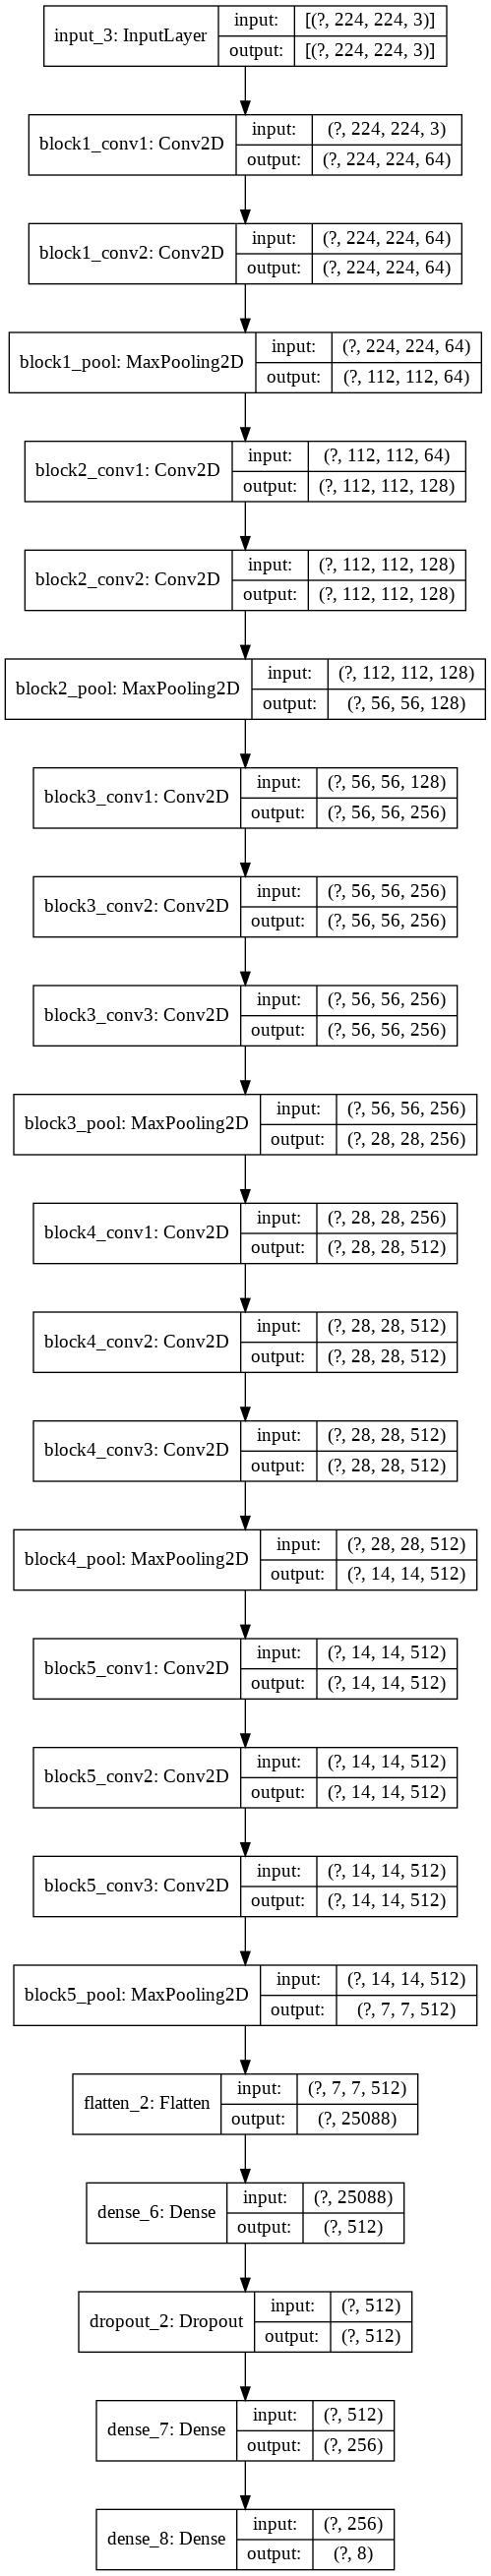

In [ ]:
keras.utils.plot_model(transfer_model, show_shapes=True)

In [ ]:

from tensorflow.keras import layers, models, Model, optimizers

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

In [ ]:

# Here we use testing set as validation set
history = transfer_model.fit(X_train, y_train, batch_size = 16, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
252/252 [==============================] - 47s 185ms/step - loss: 1.8552 - accuracy: 0.2912 - val_loss: 1.6835 - val_accuracy: 0.3737
Epoch 2/100
252/252 [==============================] - 47s 185ms/step - loss: 1.5148 - accuracy: 0.4368 - val_loss: 1.4207 - val_accuracy: 0.4565
Epoch 3/100
252/252 [==============================] - 47s 185ms/step - loss: 1.3420 - accuracy: 0.4994 - val_loss: 1.4310 - val_accuracy: 0.4519
Epoch 4/100
252/252 [==============================] - 47s 185ms/step - loss: 1.2172 - accuracy: 0.5593 - val_loss: 1.2534 - val_accuracy: 0.5284
Epoch 5/100
252/252 [==============================] - 47s 185ms/step - loss: 1.1161 - accuracy: 0.5948 - val_loss: 1.1870 - val_accuracy: 0.5608
Epoch 6/100
252/252 [==============================] - 47s 185ms/step - loss: 1.0445 - accuracy: 0.6296 - val_loss: 1.1906 - val_accuracy: 0.5626
Epoch 7/100
252/252 [==============================] - 47s 185ms/step - loss: 0.9656 - accuracy: 0.6569 - val_loss: 1.1042 -

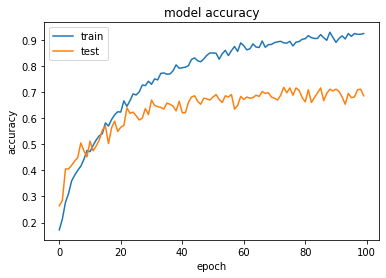

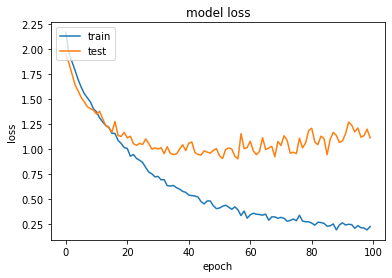

In [ ]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()